<a href="https://colab.research.google.com/github/mayukbasu/Amazon-Reviews/blob/main/ITC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions for Group Project
Code and submit an original Python program (preferably on Jupyter Notebook with explanatory comments) on any business idea involving all the following activities:
* Input (scraping/API-importing data from web)
* Processing (storing & querying in database, data wrangling using OOP, data structures, and algorithms)
* Output (apply any analytics model and display results)
* Present a few slides to summarize your project, and explain how you applied various computing concepts taught in the course
* Give a live demo of your project in class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import plotly.express as px
import plotly.express as px
px.defaults.template = "plotly"
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import math
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

### **Dataset Description: Stock Market Monthly Data**

This dataset comprises structured monthly stock market data for a selected list of prominent companies. The data has been fetched using the **Alpha Vantage API**, a widely used financial data provider offering real-time and historical market information. By processing the API's JSON response, this dataset captures essential stock performance metrics over time. It can be used for various financial analyses, including trend analysis, risk assessment, and investment decision-making.

---

### **Dataset Features**
Each record in the dataset contains the following attributes:

1. **symbol**:  
   - Represents the stock ticker symbol for the company (e.g., **"META"** for Meta Platforms, **"KO"** for Coca-Cola).  
   - Helps identify the company for which the stock data corresponds.  
   - **Type**: String  

2. **date**:  
   - Indicates the specific month and year associated with the stock data (e.g., **"2023-12"**).  
   - Provides the temporal dimension for analyzing stock trends over time.  
   - **Format**: YYYY-MM  
   - **Type**: String  

3. **opening price**:  
   - The stock's price at the beginning of trading on the first day of the month.  
   - Useful for comparing how the stock started versus how it closed at the end of the month.  
   - **Type**: Float  

4. **closing price**:  
   - The stock's price at the end of trading on the last day of the month.  
   - A key metric for tracking the overall monthly performance of the stock.  
   - **Type**: Float  

5. **high**:  
   - The highest price the stock reached during the month.  
   - An indicator of the stock's peak performance and market sentiment.  
   - **Type**: Float  

6. **low**:  
   - The lowest price the stock fell to during the month.  
   - Often used to gauge the stock's volatility and identify significant price drops.  
   - **Type**: Float  

7. **volume**:  
   - The total number of shares traded during the month.  
   - Indicates trading activity and the stock's liquidity for the period.  
   - **Type**: Integer  

8. **dividend**:  
   - The dividend amount paid per share during the month, if applicable.  
   - Useful for analyzing income-generating stocks and shareholder returns.  
   - **Type**: Float  

---

### **Data Source**
The data is fetched from the **Alpha Vantage API**, which provides both free and premium services for financial data. The dataset uses the **Monthly Adjusted Time Series** function of the API, which includes dividends and adjusted closing prices.

### **Companies Included**
The dataset focuses on a diverse set of companies across industries, represented by their stock ticker symbols:
- **META**: Meta Platforms (Technology & Social Media)  
- **KO**: Coca-Cola (Consumer Goods)  
- **NFLX**: Netflix (Media & Entertainment)  
- **AAPL**: Apple (Technology)  
- **IBM**: International Business Machines Corporation (Technology & Consulting)  

---

### **Example Use Cases**
1. **Trend Analysis**:  
   - Analyze how stock prices have changed over months or years for individual companies.  
   - Example: Study Apple’s stock price performance to identify growth patterns.

2. **Volatility Studies**:  
   - Measure the difference between the high and low prices of stocks to understand market volatility.  
   - Example: Assess Netflix’s stock behavior to determine investment risk.

3. **Volume Tracking**:  
   - Examine the trading volume to gauge market interest and liquidity for specific stocks.  
   - Example: Compare Coca-Cola’s trading activity over time to evaluate investor sentiment.

4. **Dividend Insights**:  
   - Track dividend payments for companies to analyze their shareholder return strategy.  
   - Example: Review IBM’s dividend history to identify trends in income distribution.

5. **Comparative Analysis**:  
   - Compare performance metrics across different companies to identify outperformers and underperformers.  
   - Example: Analyze Apple and Meta’s monthly highs to identify which company has higher market confidence.

---

### **Technical Details**
1. **Data Structure**:  
   - Stored as a **list of dictionaries** in Python, where each dictionary represents a single record.  
   - Example record structure:  
     ```python
     {
         'symbol': 'AAPL',
         'date': '2023-12',
         'opening price': 175.30,
         'closing price': 180.75,
         'high': 185.20,
         'low': 170.00,
         'volume': 25000000,
         'dividend': 0.20
     }
     ```

2. **APIs Used**:  
   - **API Function**: `TIME_SERIES_MONTHLY_ADJUSTED`  
   - **Output Size**: `Compact` (providing the most recent 100 data points for each symbol).  

3. **Preprocessing**:  
   - JSON data from the API is parsed and transformed into a structured format using the **process_data** function.  

4. **Storage**:  
   - The processed data is appended to a Python list (**records**), which can be exported to a DataFrame for analysis.

---

### **Benefits**
- **Customizable**: Easy to extend by adding more stock symbols or parameters.  
- **Real-Time Updates**: The API allows regular updates to fetch the latest stock data.  
- **Analytical Potential**: Provides essential metrics for a range of financial analyses.  

This dataset is ideal for financial analysts, students, researchers, and investors who want to gain insights into historical stock performance.


# Pulling data using API

In [ ]:
records = []
def process_data(data,i):

  # Extract monthly data
  monthly_data = data['Monthly Adjusted Time Series']

  # Create a list of records for the DataFrame
  for date, values in monthly_data.items():
    #symbol = data['Meta Data']['2. Symbol']
    record = {
        'symbol': i,
        'date': date,
        'opening price': values['1. open'],
        'closing price': values['4. close'],
        'high': values['2. high'],
        'low': values['3. low'],
        'volume': values['6. volume'],
        'dividend': values['7. dividend amount']
    }
    records.append(record)

This function, process_data(data, i), extracts monthly stock data from the Monthly Adjusted Time Series of a JSON object. It retrieves details like the opening price, closing price, high, low, volume, and dividend for each date and stores them in a dictionary along with the stock symbol (i). These records are then appended to the records list for further analysis or DataFrame creation.

In [ ]:
import requests
# Step 1: Fetch Stock Market Data using Alpha Vantage API
API_KEY = "53BL7MPIRQ5PY27Y"  # Replace with your API key
BASE_URL = "https://www.alphavantage.co/query"
SYMBOL = ["META", "KO", "NFLX", "AAPL", "IBM"]
for i in SYMBOL:
  params = {
      "function": "TIME_SERIES_MONTHLY_ADJUSTED",
      "symbol": i,
      "apikey": API_KEY,
      "outputsize": "compact"
      }
  response = requests.get(BASE_URL, params=params)
  data = response.json()
  process_data(data,i)

This code fetches monthly stock market data for a list of symbols (SYMBOL) using the Alpha Vantage API. It sends a GET request with parameters such as the API key, symbol, and function type (TIME_SERIES_MONTHLY_ADJUSTED). The JSON response is then passed to the process_data function for processing and structuring the data.

In [ ]:
df = pd.DataFrame(records)

# Convert data types
df['date'] = pd.to_datetime(df['date'])
numeric_columns = ['opening price', 'closing price', 'high', 'low', 'volume', 'dividend']
df[numeric_columns] = df[numeric_columns].replace(['None', ''], np.nan).apply(pd.to_numeric)
# Sort by date
df.sort_values(by='date', ascending=False, inplace=True)

This code creates a DataFrame from the records list and processes it for analysis. It converts the date column to a datetime format, transforms specified numeric columns to proper numerical types, replaces invalid values with NaN, and sorts the data by the date column in descending order. This ensures the DataFrame is clean and ready for analysis.









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1329
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1330 non-null   object        
 1   date           1330 non-null   datetime64[ns]
 2   opening price  1330 non-null   float64       
 3   closing price  1330 non-null   float64       
 4   high           1330 non-null   float64       
 5   low            1330 non-null   float64       
 6   volume         1330 non-null   int64         
 7   dividend       1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.5+ KB


This code displays the summary information of the DataFrame df using the df.info() method. It provides details about the column names, data types, non-null counts for each column, the total number of rows (entries), and the memory usage of the DataFrame, ensuring that the data structure is properly understood before further analysis.

In [ ]:
df.head(245)

,symbol,date,opening price,closing price,high,low,volume,dividend
0,META,2025-01-17,589.72,612.77,632.1011,587.8200,145636970,0.0
152,KO,2025-01-17,62.35,62.71,62.7650,60.6150,177351452,0.0
726,AAPL,2025-01-17,248.93,229.98,249.1000,228.0300,550371513,0.0
1028,IBM,2025-01-17,221.82,224.79,226.7110,214.6100,37780537,0.0
454,NFLX,2025-01-17,895.50,858.10,898.8300,823.5190,35434096,0.0
...,...,...,...,...,...,...,...,...
200,KO,2021-01-29,54.27,48.15,54.6300,48.1100,456801385,0.0
48,META,2021-01-29,274.78,258.33,286.7900,244.6100,452021869,0.0
502,NFLX,2021-01-29,539.00,532.39,593.2877,485.6701,139998993,0.0
774,AAPL,2021-01-29,133.52,131.96,145.0900,126.3820,2239366098,0.0


In [ ]:
records1 = []
def process_financial_data(data,i):

  # Extract annual reports
  annual_reports = data['annualReports']

  # Create a list of records for the DataFrame
  for report in annual_reports:
    record = {
        'symbol': i,
        'fiscalDateEnding': report['fiscalDateEnding'],
        'grossProfit': report['grossProfit'],
        'totalRevenue': report['totalRevenue'],
        'costOfRevenue': report['costOfRevenue'],
        'operatingIncome': report['operatingIncome'],
        'netIncome': report['netIncome'],
        'ebit': report['ebit'],
        'ebitda': report['ebitda'],
        'incomeTaxExpense': report['incomeTaxExpense'],
        'interestExpense': report['interestExpense']
    }
    records1.append(record)


This function, process_financial_data(data, i), extracts annual financial report data from a given JSON object. It collects key financial metrics, such as grossProfit, totalRevenue, operatingIncome, netIncome, and other financial indicators, along with the fiscal year (fiscalDateEnding) and stock symbol (i). Each record is added to a list named records1 for further analysis or DataFrame creation.

In [ ]:
API_KEY = "14OJYR8MEO7GVI5K"  # Replace with your API key
BASE_URL = "https://www.alphavantage.co/query"
SYMBOL = ["META", "KO", "NFLX", "AAPL", "IBM"]
for i in SYMBOL:
  params = {
      "function": "INCOME_STATEMENT",
      "symbol": i,
      "apikey": API_KEY,
      "outputsize": "compact"
      }
  response = requests.get(BASE_URL, params=params)
  data = response.json()
  process_financial_data(data,i)

This code retrieves annual income statement data for a list of stock symbols (SYMBOL) using the Alpha Vantage API. It constructs API requests with the INCOME_STATEMENT function and parameters like the stock symbol and API key. The JSON response is processed using the process_financial_data function to extract and structure key financial metrics for further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1329
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1330 non-null   object        
 1   date           1330 non-null   datetime64[ns]
 2   opening price  1330 non-null   float64       
 3   closing price  1330 non-null   float64       
 4   high           1330 non-null   float64       
 5   low            1330 non-null   float64       
 6   volume         1330 non-null   int64         
 7   dividend       1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.5+ KB


In [ ]:
# Create DataFrame from records
df1 = pd.DataFrame(records1)

# Convert date column
df1['fiscalDateEnding'] = pd.to_datetime(df1['fiscalDateEnding'])

# Define numeric columns
numeric_columns = [
    'grossProfit', 'totalRevenue', 'costOfRevenue',
    'operatingIncome', 'netIncome', 'ebit',
    'ebitda', 'incomeTaxExpense', 'interestExpense'
]

# Replace invalid strings with NaN and convert to numeric
df1[numeric_columns] = df1[numeric_columns].replace(['None', ''], np.nan).apply(pd.to_numeric)

# Sort by date
df1.sort_values(by='fiscalDateEnding', ascending=False, inplace=True)



This code creates a DataFrame (df1) from the list records1, which contains financial data. It converts the fiscalDateEnding column to a datetime format, defines a set of numeric columns (e.g., grossProfit, totalRevenue), replaces invalid strings with NaN, and converts them to numeric types. Finally, it sorts the DataFrame by fiscalDateEnding in descending order to ensure the data is clean and properly structured for analysis.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 42 to 57
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   symbol            73 non-null     object        
 1   fiscalDateEnding  73 non-null     datetime64[ns]
 2   grossProfit       73 non-null     int64         
 3   totalRevenue      73 non-null     int64         
 4   costOfRevenue     73 non-null     int64         
 5   operatingIncome   73 non-null     int64         
 6   netIncome         73 non-null     int64         
 7   ebit              73 non-null     int64         
 8   ebitda            73 non-null     int64         
 9   incomeTaxExpense  73 non-null     int64         
 10  interestExpense   72 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 6.8+ KB


In [ ]:
df1.head(45)

,symbol,fiscalDateEnding,grossProfit,totalRevenue,costOfRevenue,operatingIncome,netIncome,ebit,ebitda,incomeTaxExpense,interestExpense
42,AAPL,2024-09-30,180683000000,391035000000,236449000000,123216000000,93736000000,123216000000,134661000000,29749000000,NaN
0,META,2023-12-31,108131000000,134090000000,25959000000,46751000000,39098000000,47874000000,48384000000,8330000000,4.460000e+08
12,KO,2023-12-31,27234000000,45754000000,18520000000,11311000000,10714000000,14490000000,14584000000,2249000000,1.527000e+09
27,NFLX,2023-12-31,14007929000,33723297000,19715368000,6954003000,5407990000,6905231000,21508387000,797415000,6.998260e+08
58,IBM,2023-12-31,34300000000,61860000000,27560000000,6979000000,7502000000,10285000000,12572000000,1176000000,1.607000e+09
43,AAPL,2023-09-30,169148000000,379352000000,239069000000,114301000000,96995000000,117669000000,125820000000,16741000000,3.933000e+09
59,IBM,2022-12-31,32687000000,60530000000,27842000000,6408000000,1639000000,2229000000,4624000000,-626000000,1.216000e+09
28,NFLX,2022-12-31,12447265000,31615550000,19168285000,5632831000,4491924000,5970141000,20332955000,772005000,7.062120e+08
1,META,2022-12-31,91103000000,116352000000,25249000000,28944000000,23200000000,28944000000,29560000000,5619000000,1.850000e+08
13,KO,2022-12-31,25004000000,43004000000,18000000000,10909000000,9542000000,12539000000,12659000000,2115000000,8.820000e+08


In [ ]:
df.head()

,symbol,date,opening price,closing price,high,low,volume,dividend
0,META,2025-01-17,589.72,612.77,632.1011,587.820,145636970,0.0
152,KO,2025-01-17,62.35,62.71,62.7650,60.615,177351452,0.0
726,AAPL,2025-01-17,248.93,229.98,249.1000,228.030,550371513,0.0
1028,IBM,2025-01-17,221.82,224.79,226.7110,214.610,37780537,0.0
454,NFLX,2025-01-17,895.50,858.10,898.8300,823.519,35434096,0.0


In [ ]:
df.shape

(1330, 8)

In [ ]:
df.columns

Index(['symbol', 'date', 'opening price', 'closing price', 'high', 'low',
       'volume', 'dividend'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1329
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1330 non-null   object        
 1   date           1330 non-null   datetime64[ns]
 2   opening price  1330 non-null   float64       
 3   closing price  1330 non-null   float64       
 4   high           1330 non-null   float64       
 5   low            1330 non-null   float64       
 6   volume         1330 non-null   int64         
 7   dividend       1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.5+ KB


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1330,2013-07-04 06:50:20.751879680,1999-12-31 00:00:00,2007-06-29 00:00:00,2014-01-15 12:00:00,2019-07-31 00:00:00,2025-01-17 00:00:00,NaN
opening price,1330.0,146.795007,8.8,50.4875,108.79,179.115,895.5,137.992762
closing price,1330.0,147.695413,8.971,50.765,109.755,179.785,891.32,139.374431
high,1330.0,158.109104,10.3,54.14,118.855,192.57,941.75,149.209436
low,1330.0,136.291961,4.85,47.505,99.665,168.44,884.12,127.88968
volume,1330.0,329178875.978195,3982100.0,101707900.0,189448776.5,386706250.0,3886793083.0,392395987.632558
dividend,1330.0,0.12709,0.0,0.0,0.0,0.0,3.29,0.375786


In [ ]:
# Investigating the presence of missing values in DataFrame df1
missing_data_counts = df.isnull().sum()
missing_data_counts

,0
symbol,0
date,0
opening price,0
closing price,0
high,0
low,0
volume,0
dividend,0


In [ ]:
# Identifying duplicate rows in the dataset df1

duplicate_rows = df[df.duplicated()]
print("Number of Duplicate Rows: ", len(duplicate_rows))
duplicate_rows.head()

Number of Duplicate Rows:  0


,symbol,date,opening price,closing price,high,low,volume,dividend


In [ ]:
#dropping the duplicate rows
df.drop_duplicates(inplace = True)
print(df.shape)

(1330, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1329
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         1330 non-null   object        
 1   date           1330 non-null   datetime64[ns]
 2   opening price  1330 non-null   float64       
 3   closing price  1330 non-null   float64       
 4   high           1330 non-null   float64       
 5   low            1330 non-null   float64       
 6   volume         1330 non-null   int64         
 7   dividend       1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.5+ KB


In [ ]:
import plotly.express as px
fig = px.line(df, x='date',
              y='closing price',
              color='symbol',
              title="Stock Market Performance")
fig.show()

In [ ]:
fig = px.area(df, x='date', y='closing price', color='symbol',
              facet_col='symbol',
              labels={'date':'Date', 'closing price':'Closing Price', 'symbol':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, Amazon, and Google')
fig.show()

In [ ]:
df['MA10'] = df.groupby('symbol')['closing price'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('symbol')['closing price'].rolling(window=20).mean().reset_index(0, drop=True)

for symbol, group in df.groupby('symbol'):
    print(f'Moving Averages for {symbol}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
        MA10     MA20
726      NaN      NaN
727      NaN      NaN
728      NaN      NaN
729      NaN      NaN
730      NaN      NaN
...      ...      ...
1023  47.050  33.5610
1024  58.469  39.2865
1025  68.443  44.1395
1026  77.168  48.5515
1027  85.493  52.7645

[302 rows x 2 columns]
Moving Averages for IBM
         MA10      MA20
1028      NaN       NaN
1029      NaN       NaN
1030      NaN       NaN
1031      NaN       NaN
1032      NaN       NaN
...       ...       ...
1325  107.426  106.5660
1326  108.063  106.7050
1327  109.838  106.4390
1328  111.713  107.4655
1329  112.650  107.8615

[302 rows x 2 columns]
Moving Averages for KO
       MA10     MA20
152     NaN      NaN
153     NaN      NaN
154     NaN      NaN
155     NaN      NaN
156     NaN      NaN
..      ...      ...
449  56.910  52.0420
450  55.804  52.0410
451  54.573  52.0785
452  54.054  52.6080
453  53.841  53.0870

[302 rows x 2 columns]
Moving Averages for META
         MA10       MA20
0 

In [ ]:
for symbol, group in df.groupby('symbol'):
    fig = px.line(group, x='date', y=['closing price', 'MA10', 'MA20'],
                  title=f"{symbol} Moving Averages")
    fig.show()

In [ ]:
df['Volatility'] = df.groupby('symbol')['closing price'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='date', y='Volatility',
              color='symbol',
              title='Volatility of All Companies')
fig.show()

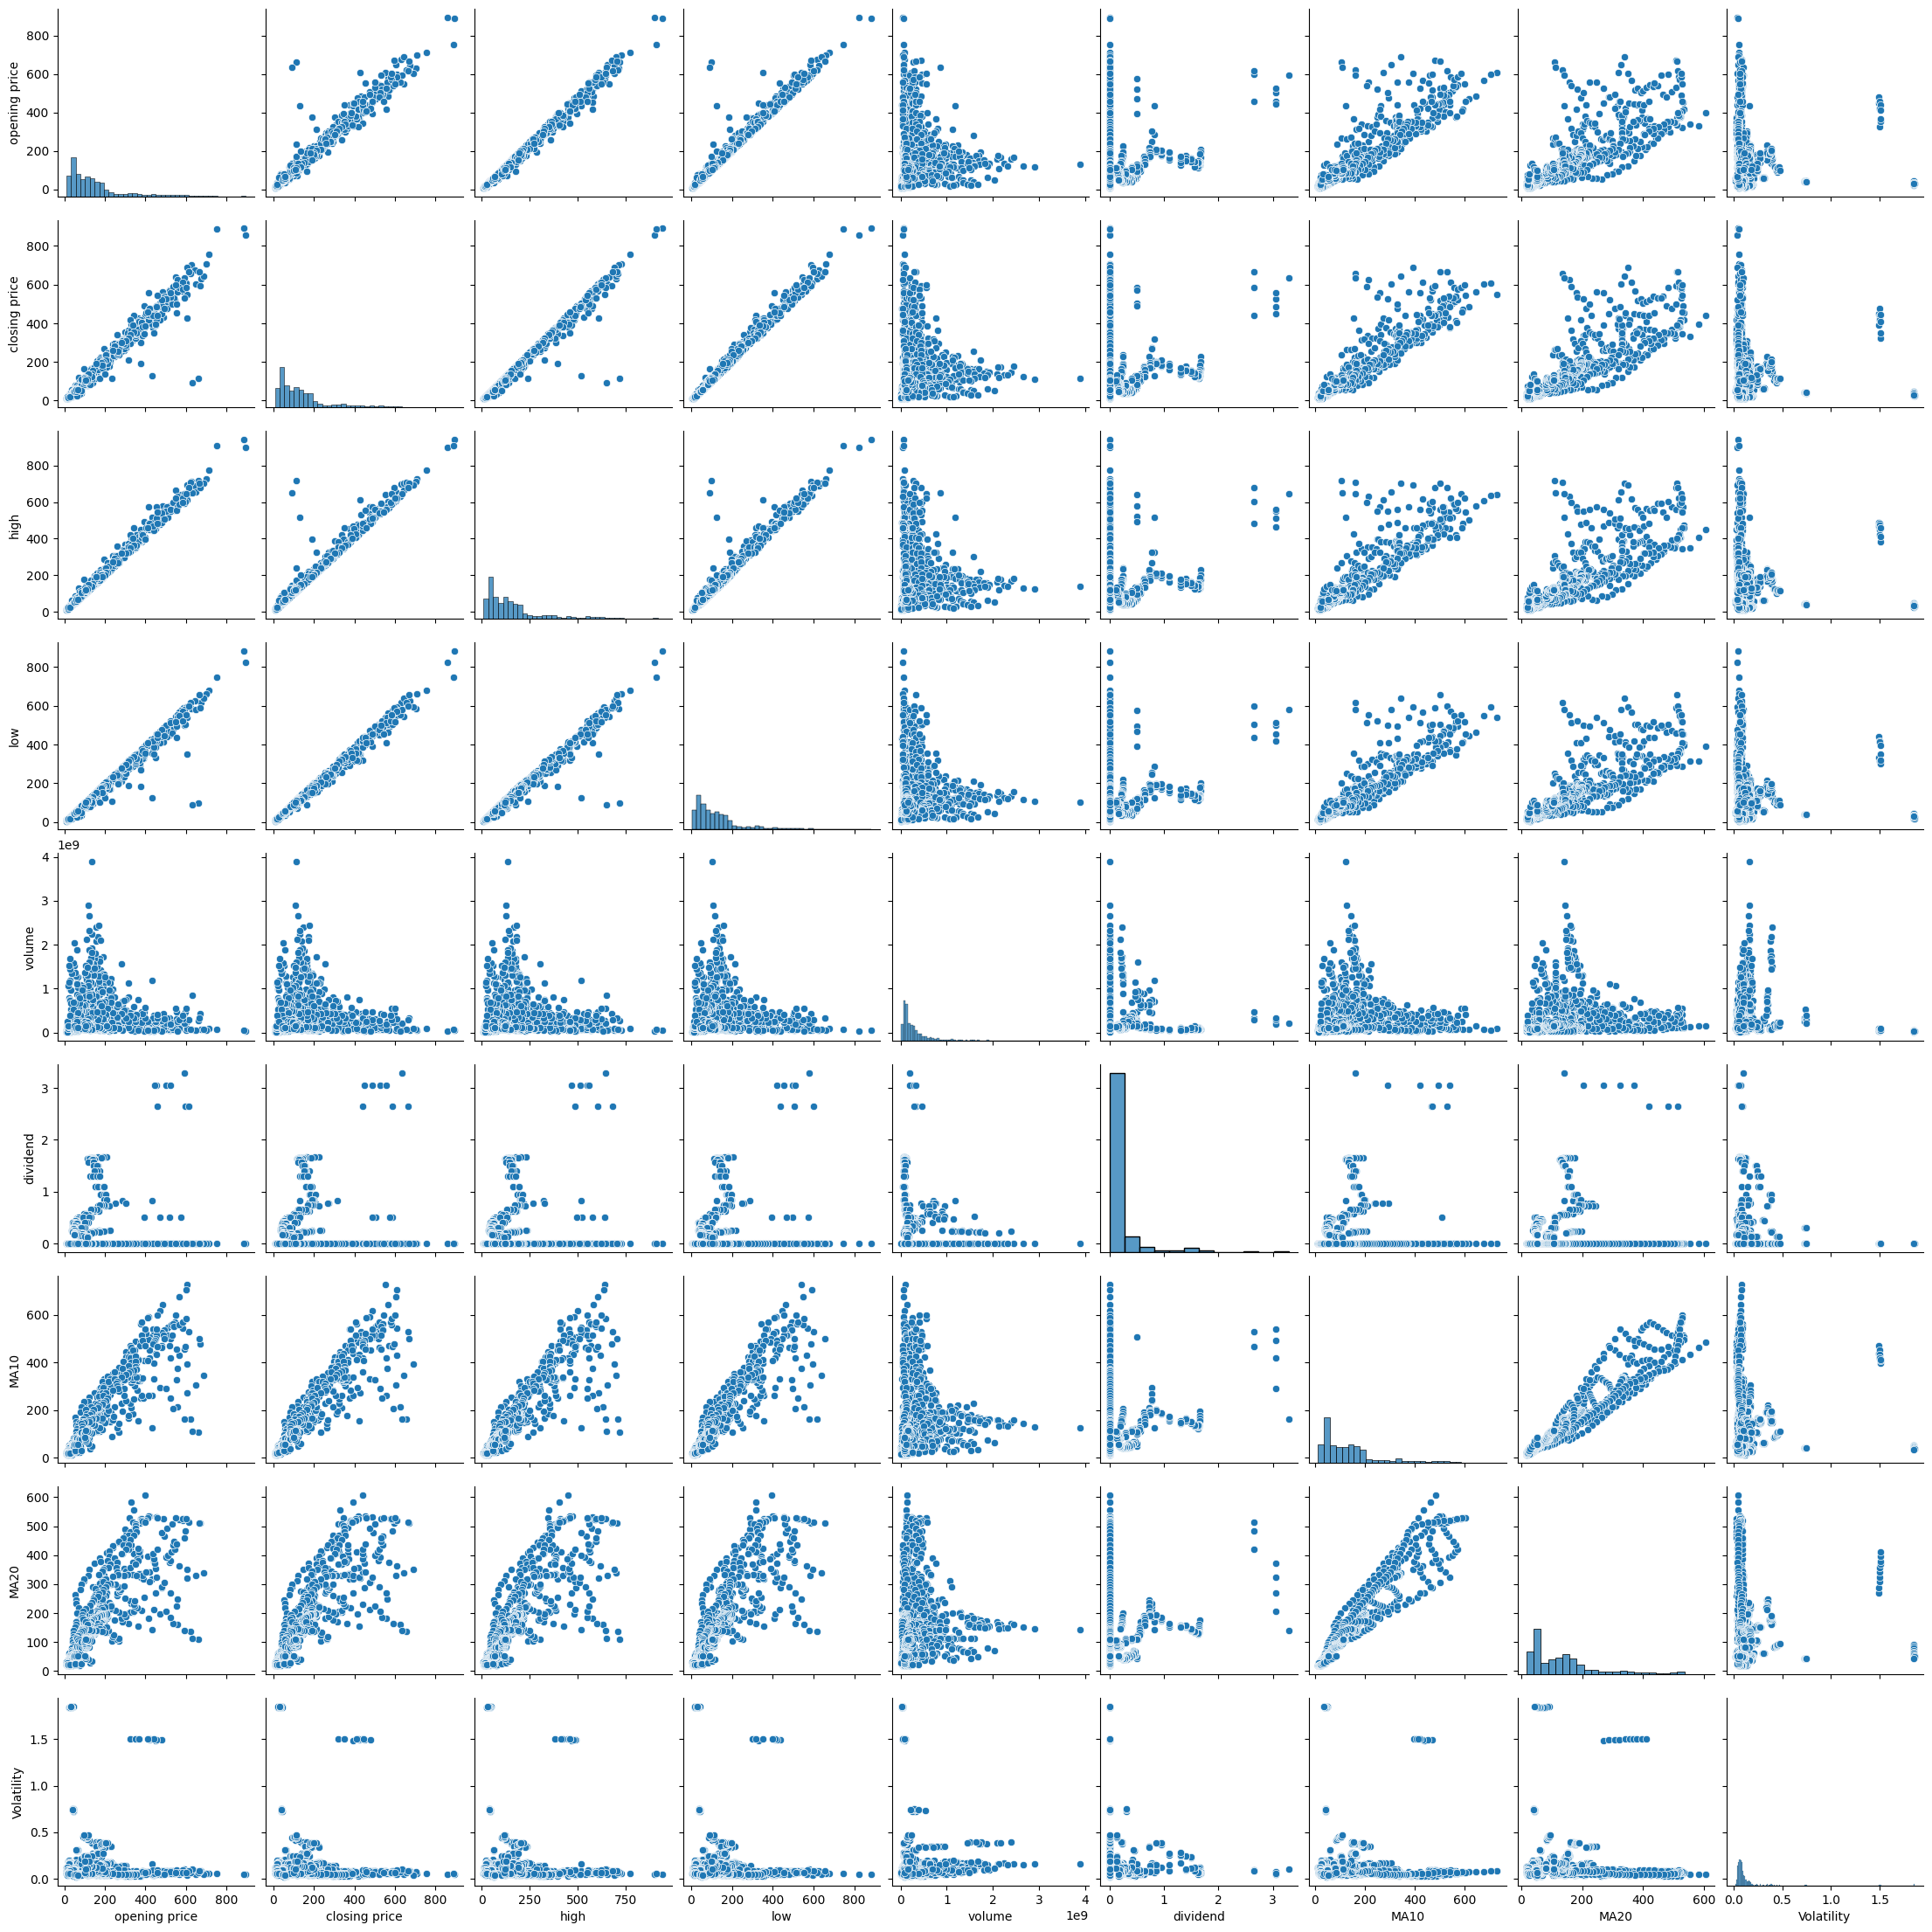

In [ ]:
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(df)
# to show
plt.show()


In [ ]:
apple = df[df['symbol'] == 'AAPL']
microsoft = df[df['symbol'] == 'MSFT']
df_corr = pd.merge(apple, microsoft, on='date')

# create a scatter plot to visualize the correlation
# fig = px.scatter(df_corr, x='AAPL', y='MSFT',
#                  trendline='ols',
#                  title='Correlation between Apple and Microsoft')
# fig.show()

In [ ]:
import plotly.express as px

def plot_correlation(company1, company2):
  company1_data = df[df['symbol'] == company1]
  company2_data = df[df['symbol'] == company2]
  df_corr = pd.merge(company1_data, company2_data, on='date', suffixes=('_' + company1, '_' + company2))
  fig = px.scatter(df_corr, x='closing price_' + company1, y='closing price_' + company2,
                   trendline='ols',
                   title=f'Correlation between {company1} and {company2}')
  fig.show()

plot_correlation('AAPL', 'IBM')
plot_correlation('KO', 'META')

In [ ]:
df1.head()

,symbol,fiscalDateEnding,grossProfit,totalRevenue,costOfRevenue,operatingIncome,netIncome,ebit,ebitda,incomeTaxExpense,interestExpense,NetProfit
42,AAPL,2024-09-30,180683000000,391035000000,236449000000,123216000000,93736000000,123216000000,134661000000,29749000000,NaN,154586000000
0,META,2023-12-31,108131000000,134090000000,25959000000,46751000000,39098000000,47874000000,48384000000,8330000000,4.460000e+08,108131000000
12,KO,2023-12-31,27234000000,45754000000,18520000000,11311000000,10714000000,14490000000,14584000000,2249000000,1.527000e+09,27234000000
27,NFLX,2023-12-31,14007929000,33723297000,19715368000,6954003000,5407990000,6905231000,21508387000,797415000,6.998260e+08,14007929000
58,IBM,2023-12-31,34300000000,61860000000,27560000000,6979000000,7502000000,10285000000,12572000000,1176000000,1.607000e+09,34300000000


In [ ]:
df1.shape

(73, 12)

In [ ]:
df1.columns

Index(['symbol', 'fiscalDateEnding', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'operatingIncome', 'netIncome', 'ebit', 'ebitda',
       'incomeTaxExpense', 'interestExpense', 'NetProfit'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 42 to 57
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   symbol            73 non-null     object        
 1   fiscalDateEnding  73 non-null     datetime64[ns]
 2   grossProfit       73 non-null     int64         
 3   totalRevenue      73 non-null     int64         
 4   costOfRevenue     73 non-null     int64         
 5   operatingIncome   73 non-null     int64         
 6   netIncome         73 non-null     int64         
 7   ebit              73 non-null     int64         
 8   ebitda            73 non-null     int64         
 9   incomeTaxExpense  73 non-null     int64         
 10  interestExpense   72 non-null     float64       
 11  NetProfit         73 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 7.4+ KB


In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
fiscalDateEnding,73,2017-04-19 12:49:18.904109568,2009-09-30 00:00:00,2013-12-31 00:00:00,2016-12-31 00:00:00,2020-12-31 00:00:00,2024-09-30 00:00:00,NaN
grossProfit,73.0,43056400821.917809,590998000.0,15061000000.0,28964000000.0,50361000000.0,180683000000.0,41833976154.243729
totalRevenue,73.0,88110375328.76712,1670269000.0,30635000000.0,47759000000.0,102874000000.0,391397000000.0,97104430019.965103
costOfRevenue,73.0,50211519068.493149,1079271000.0,12770000000.0,25865000000.0,49683000000.0,248640000000.0,64271785558.313095
operatingIncome,73.0,22963986917.80822,49992000.0,6194509000.0,10228000000.0,24913000000.0,123216000000.0,29706493937.453686
netIncome,73.0,18882755287.671234,17152000.0,4491924000.0,9019000000.0,22112000000.0,99803000000.0,24342090458.192242
ebit,73.0,24386242520.547947,50466000.0,6217000000.0,12070000000.0,25370000000.0,123216000000.0,30343957029.559479
ebitda,73.0,27407433068.493149,95935000.0,9282000000.0,14154000000.0,26010000000.0,134661000000.0,32143031654.056911
incomeTaxExpense,73.0,4790306643.835616,-1360000000.0,723875000.0,2581000000.0,5619000000.0,29749000000.0,5939681223.730344
interestExpense,72.0,755863652.777778,0.0,113537000.0,461000000.0,898000000.0,3933000000.0,898324476.394556


In [ ]:
missing_data_counts = df1.isnull().sum()
missing_data_counts

,0
symbol,0
fiscalDateEnding,0
grossProfit,0
totalRevenue,0
costOfRevenue,0
operatingIncome,0
netIncome,0
ebit,0
ebitda,0
incomeTaxExpense,0


In [ ]:
#dropping the duplicate rows
df1.drop_duplicates(inplace = True)
print(df1.shape)

(73, 12)


In [ ]:
# Identifying duplicate rows in the dataset df1

duplicate_rows = df1[df1.duplicated()]
print("Number of Duplicate Rows: ", len(duplicate_rows))
duplicate_rows.head()

Number of Duplicate Rows:  0


,symbol,fiscalDateEnding,grossProfit,totalRevenue,costOfRevenue,operatingIncome,netIncome,ebit,ebitda,incomeTaxExpense,interestExpense,NetProfit


In [ ]:
import plotly.express as px

# Assuming df1 is your DataFrame with financial data

# Calculate Net Profit
df1['NetProfit'] = df1['totalRevenue'] - df1['costOfRevenue']

# Group data by symbol for plotting
for symbol in df1['symbol'].unique():
    symbol_data = df1[df1['symbol'] == symbol]

    # Plot Net Profit vs. Total Revenue
    fig = px.line(symbol_data, x='fiscalDateEnding', y=['NetProfit', 'totalRevenue'],
                  title=f'Net Profit and Total Revenue for {symbol}',
                  labels={'fiscalDateEnding':'Fiscal Date', 'value':'Amount', 'variable':'Metric'})
    fig.show()

    # Plot other potential charts
    # Example: Bar chart of net profit over time
    fig_bar = px.bar(symbol_data, x='fiscalDateEnding', y='NetProfit',
                    title=f'Net Profit over Time for {symbol}',
                    labels={'fiscalDateEnding': 'Fiscal Date', 'NetProfit':'Net Profit'})
    fig_bar.show()


Predicting EBITDA (Regression Model)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming merged_df is already defined and contains the necessary columns

# Function to train and evaluate a model for a specific symbol
def train_and_evaluate_model(symbol_df, features, target):
    X = symbol_df[features].fillna(0)  # Handle missing values
    y = symbol_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test, y_test)
    return mse, rmse, r2, model.coef_, model.intercept_


# Group by symbol and apply the function
features = ['grossProfit', 'totalRevenue', 'netIncome']
target = 'ebitda'
results = {}

for symbol in ["AAPL", "META", "GOOGL"]:
    symbol_df = df1[df1['symbol'] == symbol]
    if len(symbol_df) < 2:  # Skip symbols with insufficient data for splitting
        print(f"Skipping symbol {symbol} due to insufficient data points.")
        continue

    mse, rmse, r2, coefficients, intercept = train_and_evaluate_model(symbol_df, features, target)
    results[symbol] = {
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'coefficients': coefficients,
        'intercept': intercept
    }

# Print the results
for symbol, result in results.items():
    print(f"Results for {symbol}:")
    print(f"  Mean Squared Error (MSE): {result['mse']}")
    print(f"  Root Mean Squared Error (RMSE): {result['rmse']}")
    print(f"  R-squared: {result['r2']}")
    print(f"  Coefficients: {result['coefficients']}")
    print(f"  Intercept: {result['intercept']}")
    print("-" * 20)

Skipping symbol GOOGL due to insufficient data points.
Results for AAPL:
  Mean Squared Error (MSE): 1.383690213704625e+19
  Root Mean Squared Error (RMSE): 3719798668.886026
  R-squared: 0.9934650666936328
  Coefficients: [0.21373367 0.08386854 0.57367136]
  Intercept: 4700184872.372856
--------------------
Results for META:
  Mean Squared Error (MSE): 6.600421134258097e+17
  Root Mean Squared Error (RMSE): 812429759.0720134
  R-squared: 0.9984882376334371
  Coefficients: [ 1.33579568 -0.94740143  0.79747376]
  Intercept: 112627348.06092834
--------------------


Hypothesis Testing to check if closing price Meta Variance == IBM Variance in 2024

In [ ]:
from scipy.stats import levene

# Filter data for 2024
df_2024 = df[df['date'].dt.year == 2024]

# Extract closing prices for Meta and Google
meta_closing_prices = df_2024[df_2024['symbol'] == 'META']['closing price']
googl_closing_prices = df_2024[df_2024['symbol'] == 'IBM']['closing price']

# Perform Levene's test
statistic, p_value = levene(meta_closing_prices, googl_closing_prices)

# Print the results
print(f"Levene's test statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The variances of the two groups are not significantly different.")
else:
    print("The variances of the two groups are significantly different.")

Levene's test statistic: 8.822827066280967
P-value: 0.007063442901051006
The variances of the two groups are significantly different.


Timeseries Forecasting of stock prices for Meta and Netflix

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with 'symbol', 'date', and 'closing price' columns

for symbol in ["META", "NFLX"]:
    symbol_data = df[df['symbol'] == symbol].sort_values('date')

    # Filter for the last 10 years
    ten_years_ago = symbol_data['date'].max() - pd.DateOffset(years=10)
    symbol_data = symbol_data[symbol_data['date'] >= ten_years_ago]

    # Fit ARIMA model
    try:
        model = ARIMA(symbol_data['closing price'], order=(5,1,0)) # Example order, tune as needed
        model_fit = model.fit()

        # Forecast
        forecast_steps = 30 # Example forecast horizon
        forecast = model_fit.predict(start=len(symbol_data), end=len(symbol_data)+forecast_steps-1)

        # Create plot
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=symbol_data['date'], y=symbol_data['closing price'], mode='lines', name='Observed', line=dict(color='blue')))
        fig.add_trace(go.Scatter(x=pd.date_range(start=symbol_data['date'].max(), periods=forecast_steps), y=forecast, mode='lines', name='Forecast', line=dict(color='orange')))
        fig.update_layout(title=f'Closing Price Forecast for {symbol}', xaxis_title='Date', yaxis_title='Closing Price')
        fig.show()

    except Exception as e:
        print(f"Error forecasting for {symbol}: {e}")

Dropdown to analyse Stocks

In [ ]:
# Create a dropdown widget for symbol selection
symbol_dropdown = widgets.Dropdown(
    options=df['symbol'].unique(),
    value=df['symbol'].unique()[0],  # Default to the first symbol
    description='Select Symbol:',
)

# Output area for displaying results and chart
output_area = widgets.Output()

# Function to handle dropdown changes
def on_symbol_change(change):
    with output_area:
        clear_output(wait=True)
        selected_symbol = change.new
        symbol_data = df[df['symbol'] == selected_symbol]

        # Display moving averages
        print(f"Moving Averages for {selected_symbol}")
        print(symbol_data[['MA10', 'MA20']].dropna())  # Only show non-null values

        # Display closing prices for 2024
        closing_2024 = symbol_data[symbol_data['date'].dt.year == 2024]
        print(f"\nClosing Prices for {selected_symbol} in 2024")
        if not closing_2024.empty:
            print(closing_2024['closing price'])
        else:
            print("No closing price data available for 2024")

        # Create and display the chart
        fig = px.line(symbol_data, x='date', y=['closing price', 'MA10', 'MA20'],
                      title=f"{selected_symbol} Closing Prices and Moving Averages")
        fig.show()
fig = px.line(df, x='date',
              y='closing price',
              color='symbol',
              title="Stock Market Performance")
fig.show()

# Attach the event handler to the dropdown
symbol_dropdown.observe(on_symbol_change, names='value')

# Display widgets
display(symbol_dropdown)
display(output_area)

Dropdown(description='Select Symbol:', options=('META', 'KO', 'AAPL', 'IBM', 'NFLX'), value='META')

Output()